## IMPORTING LIBRARIES

In [533]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from matplotlib.colors import ListedColormap

## EXPLORATORY DATA ANALYSIS&PREPROCESSING

In [ ]:
#READING DATA

train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

In [535]:
#GET SAMPLE
#Train Data Sample

train_df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
14693,31,technician,married,secondary,no,303,yes,no,cellular,15,jul,196,4,-1,0,unknown,no
6789,31,technician,single,primary,no,449,yes,no,unknown,28,may,174,1,-1,0,unknown,no
9392,29,technician,single,secondary,no,778,yes,no,unknown,6,jun,1994,2,-1,0,unknown,no
42573,78,retired,divorced,primary,no,4917,no,no,cellular,29,dec,195,2,-1,0,unknown,no
8977,35,blue-collar,married,secondary,no,344,no,no,unknown,5,jun,25,1,-1,0,unknown,no
39761,25,unemployed,single,tertiary,no,343,no,no,cellular,1,jun,377,1,-1,0,unknown,yes
11045,43,technician,married,secondary,no,236,no,no,unknown,17,jun,169,4,-1,0,unknown,no
6379,60,blue-collar,married,primary,no,93,no,yes,unknown,27,may,125,4,-1,0,unknown,no
18465,39,management,married,tertiary,no,55,no,no,cellular,31,jul,216,4,-1,0,unknown,no
17240,56,blue-collar,divorced,secondary,no,1346,no,yes,cellular,28,jul,240,3,-1,0,unknown,no


In [536]:
#Test Data Sample
test_df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3890,31,services,divorced,primary,no,459,yes,no,cellular,7,may,623,1,293,1,success,yes
2781,59,blue-collar,married,secondary,no,5314,yes,no,cellular,5,may,200,3,-1,0,unknown,no
3921,37,entrepreneur,married,tertiary,no,7944,no,no,cellular,21,nov,102,1,-1,0,unknown,no
4407,45,admin.,divorced,secondary,no,59,yes,no,cellular,24,jul,873,8,-1,0,unknown,yes
2218,58,blue-collar,married,primary,no,0,yes,no,cellular,31,jul,5,25,-1,0,unknown,no
694,49,management,married,tertiary,no,1430,no,no,cellular,18,nov,231,2,-1,0,unknown,no
4390,40,blue-collar,married,secondary,no,4795,yes,no,cellular,17,apr,57,1,-1,0,unknown,no
158,27,self-employed,single,secondary,no,50,no,no,cellular,29,jan,168,1,-1,0,unknown,no
2567,40,blue-collar,married,secondary,no,0,yes,yes,unknown,29,may,245,3,-1,0,unknown,no
2171,26,technician,married,secondary,no,18,yes,yes,cellular,5,may,138,1,-1,0,unknown,no


In [537]:
#GET DATA INFORMATION
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [538]:
# Get statistical analysis

train_df['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

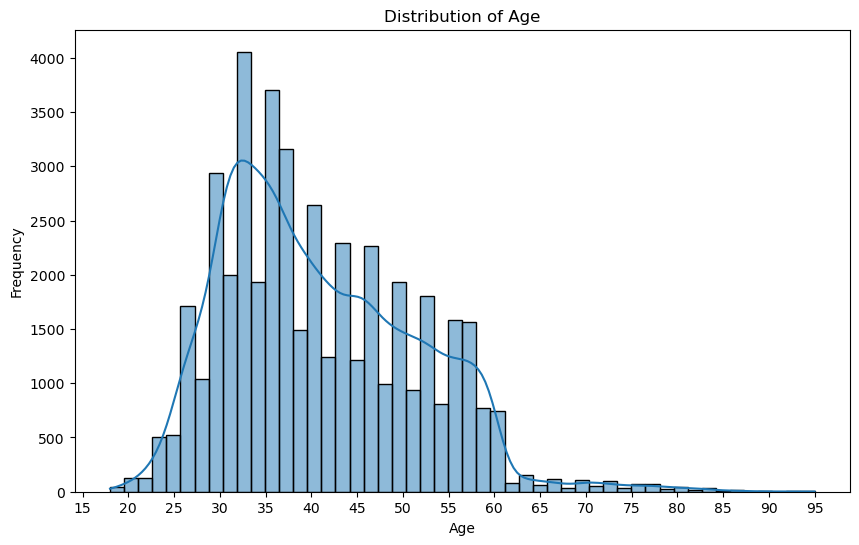

In [539]:
# Define figure size
plt.figure(figsize=(10, 6))

# Plot the histogram
ax = sns.histplot(train_df['age'], bins=50, kde=True)

# Add labels and title
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks([i for i in range(15, 100, 5)])


# Show the plot
plt.show()

- The most prevalent age range is [30 - 47]

In [540]:
train_df['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [541]:
# renaming "unknown" values with others

train_df['job'] = train_df['job'].replace('unknown', 'others')
train_df['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
others            288
Name: count, dtype: int64

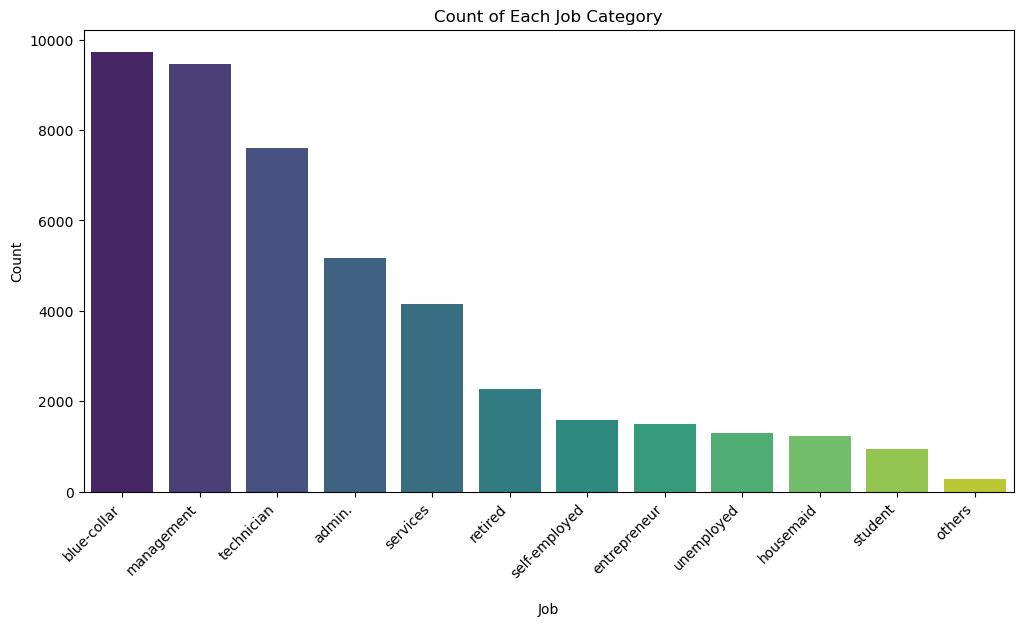

In [542]:
# Define counts
job_counts = train_df['job'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=job_counts.index, y=job_counts.values,palette='viridis')

# Add labels and title
plt.title('Count of Each Job Category')
plt.xlabel('\nJob')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [543]:
#Also renaming these values in our test data.

test_df['job'] = test_df['job'].replace('unknown', 'others')
test_df['job'].value_counts()

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
others            38
Name: count, dtype: int64

Marital-Status Feature
The marital status of the customer.

In [544]:
train_df['marital'].value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

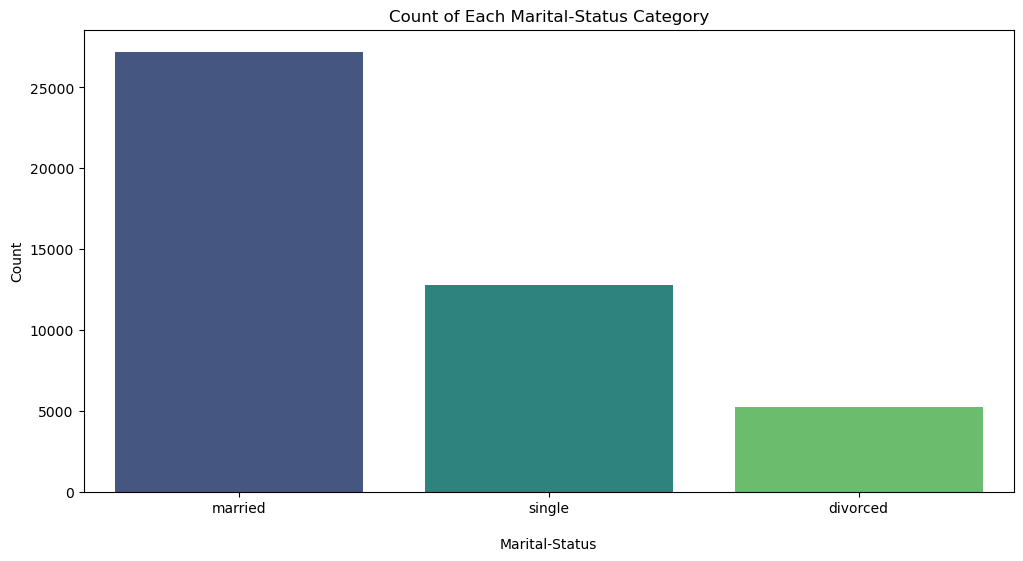

In [545]:
# Define counts
marital_counts = train_df['marital'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=marital_counts.index, y=marital_counts.values, palette='viridis')

# Add labels and title
plt.title('Count of Each Marital-Status Category')
plt.xlabel('\nMarital-Status')
plt.ylabel('Count')

# Show the plot
plt.show()

In [546]:
train_df['education'].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [547]:
# renaming "unknown" values with others

train_df['education'] = train_df['education'].replace('unknown', 'others')
train_df['education'].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
others        1857
Name: count, dtype: int64

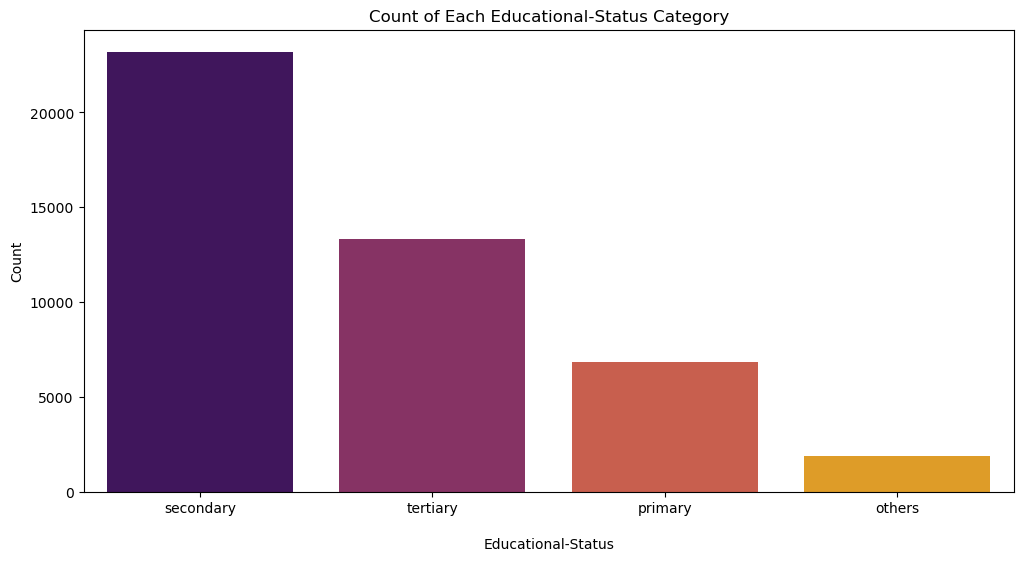

In [548]:
# Define Counts
education_counts = train_df['education'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=education_counts.index, y=education_counts.values,palette = "inferno" )

# Add labels and title
plt.title('Count of Each Educational-Status Category')
plt.xlabel('\nEducational-Status')
plt.ylabel('Count')

# Show the plot
plt.show()

In [549]:
#Also renaming these values in our test data.

test_df['education'] = test_df['education'].replace('unknown', 'others')
test_df['education'].value_counts()

education
secondary    2306
tertiary     1350
primary       678
others        187
Name: count, dtype: int64

In [550]:
train_df['default'].value_counts()

default
no     44396
yes      815
Name: count, dtype: int64

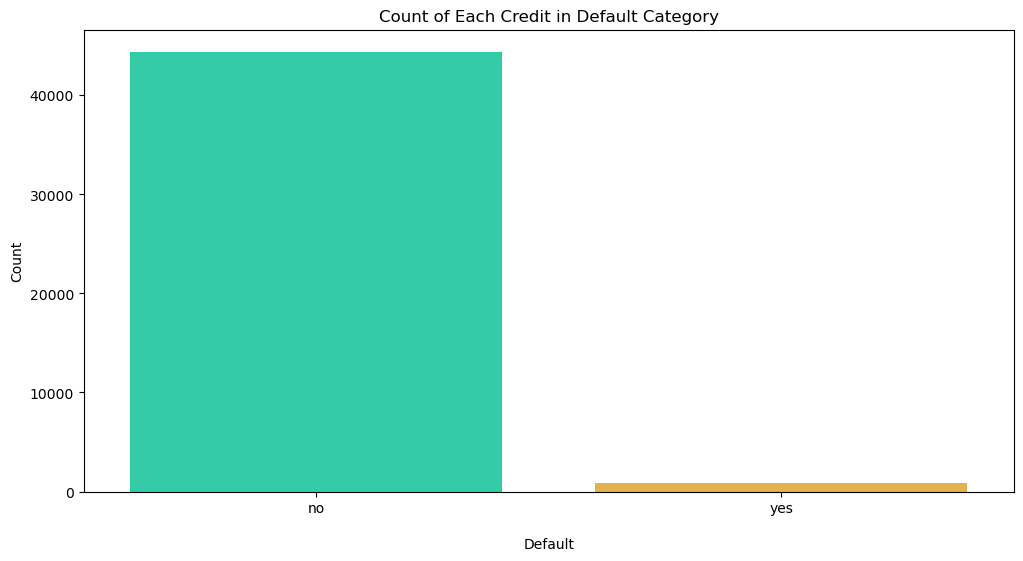

In [551]:
# Define counts
default_counts = train_df['default'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=default_counts.index, y=default_counts.values, palette='turbo')

# Add labels and title
plt.title('Count of Each Credit in Default Category')
plt.xlabel('\nDefault')
plt.ylabel('Count')

# Show the plot
plt.show()

In [552]:
#This feature is worthless, the "no" values is so poor, so We'll drop it
train_df.drop(columns=['default'], inplace=True)

In [553]:
#Also dropping the "no" values in our test data
test_df.drop(columns=['default'], inplace=True)

In [554]:
train_df['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

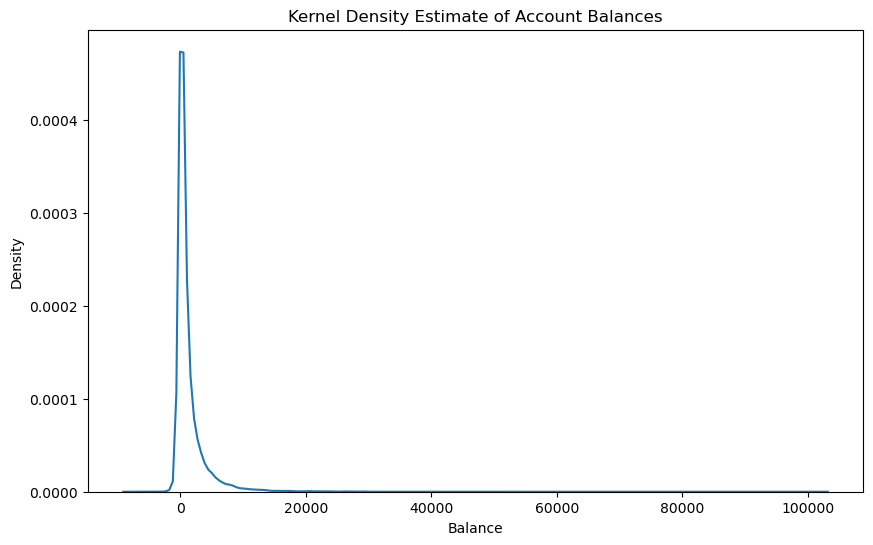

In [555]:
# Define figure size
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.kdeplot(train_df['balance'])

# Add labels and title
plt.title('Kernel Density Estimate of Account Balances')
plt.xlabel('Balance')
plt.ylabel('Density')

# Show the plot
plt.show()

In [556]:
#Check for values under zero
train_df[train_df['balance'] <= 0]['balance'].count()

7280

In [557]:
# Define the percentile threshold
percentile_threshold = 95

# Calculate the specified percentile
percentile_value = int(np.percentile(train_df['balance'], percentile_threshold))

# Identify potential outliers
outliers = train_df[train_df['balance'] > percentile_value]

print(f'{percentile_threshold}th Percentile Value: {percentile_value}')
print(f'Number of Potential Outliers: {len(outliers)}')

95th Percentile Value: 5768
Number of Potential Outliers: 2260


In [558]:
### The maximum value of 102127 is considerably higher than the 95th percentile (5768).
### I'll drop the values that above 5768.

train_df = train_df[train_df['balance'] <= 5768]

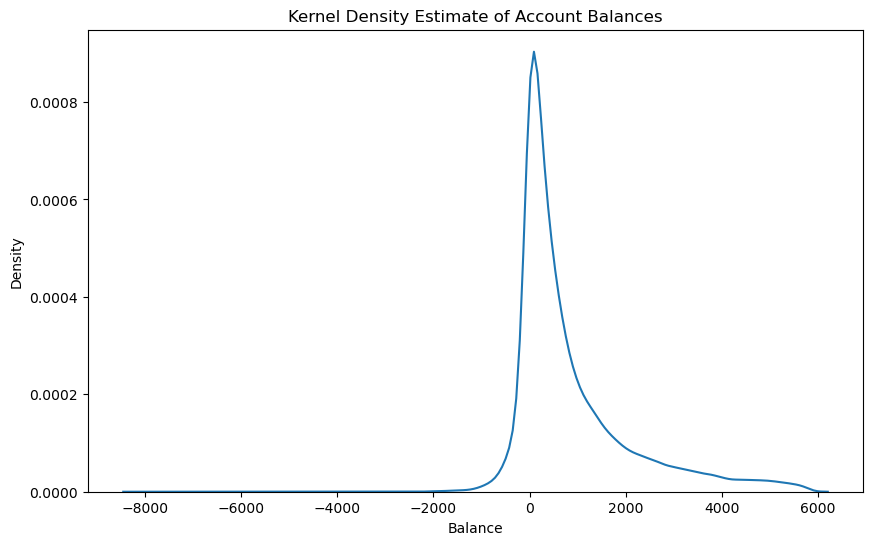

In [559]:
# Define figure size
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.kdeplot(train_df['balance'])

# Add labels and title
plt.title('Kernel Density Estimate of Account Balances')
plt.xlabel('Balance')
plt.ylabel('Density')

# Show the plot
plt.show()

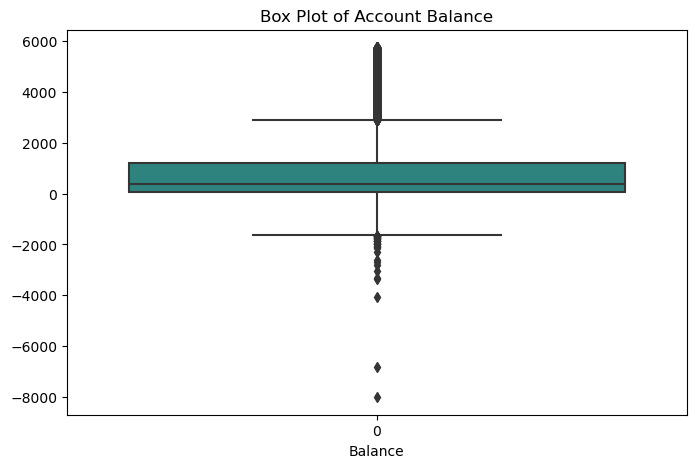

In [560]:
# Define figure size
plt.figure(figsize=(8, 5))

# Plot the boxplot
sns.boxplot(train_df['balance'], palette = 'viridis')

# Add labels and title
plt.title('Box Plot of Account Balance')
plt.xlabel('Balance')

# Show the plot
plt.show()

In [561]:
#Define the percentile threshold for outliers - 5%
# Define the percentile threshold
percentile_threshold = 5

# Calculate the specified percentile
percentile_value = int(np.percentile(train_df['balance'], percentile_threshold))

# Identify potential outliers
outliers = train_df[train_df['balance'] < percentile_value]

print(f'{percentile_threshold}th Percentile Value: {percentile_value}')
print(f'Number of Potential Outliers: {len(outliers)}')

5th Percentile Value: -191
Number of Potential Outliers: 2142


In [562]:
### The minimum value of -8019 is considerably lower than the 5th percentile (-191).
### I'll drop the values that under -191.

train_df = train_df[train_df['balance'] > -191]

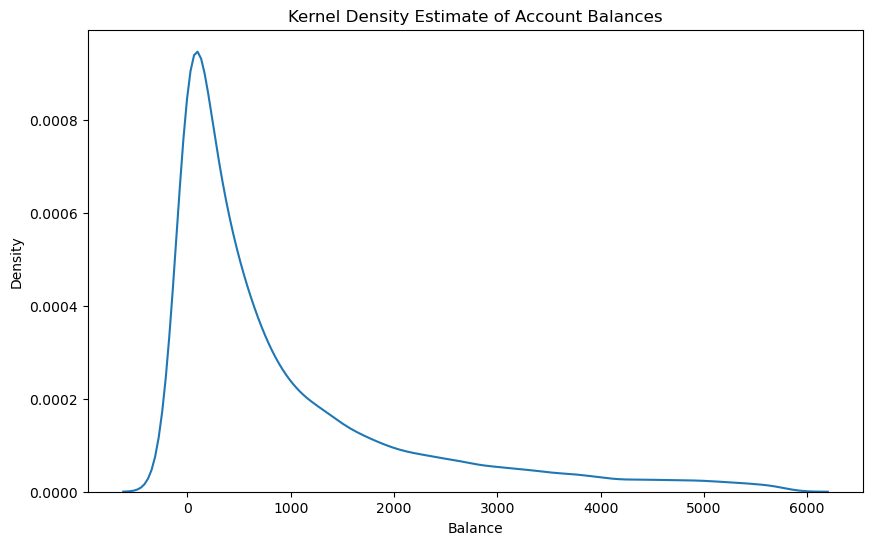

In [563]:
# Define figure size
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.kdeplot(train_df['balance'])

# Add labels and title
plt.title('Kernel Density Estimate of Account Balances')
plt.xlabel('Balance')
plt.ylabel('Density')

# Show the plot
plt.show()

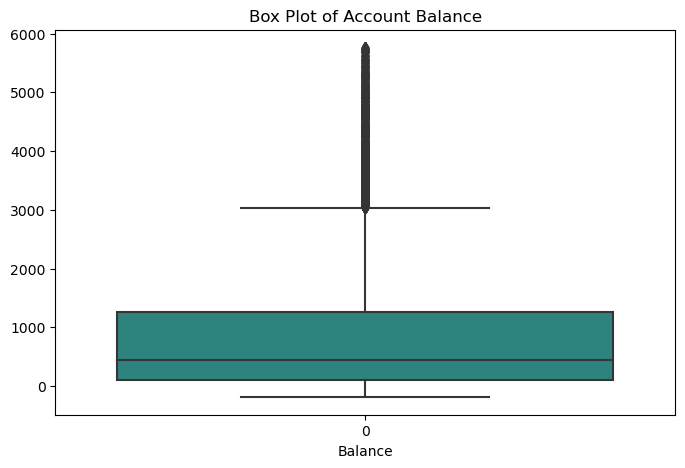

In [564]:
# Define figure size
plt.figure(figsize=(8, 5))

# Plot the boxplot
sns.boxplot(train_df['balance'], palette='viridis')

# Add labels and title
plt.title('Box Plot of Account Balance')
plt.xlabel('Balance')

# Show the plot
plt.show()

In [565]:
train_df['housing'].value_counts()

housing
yes    22448
no     18352
Name: count, dtype: int64

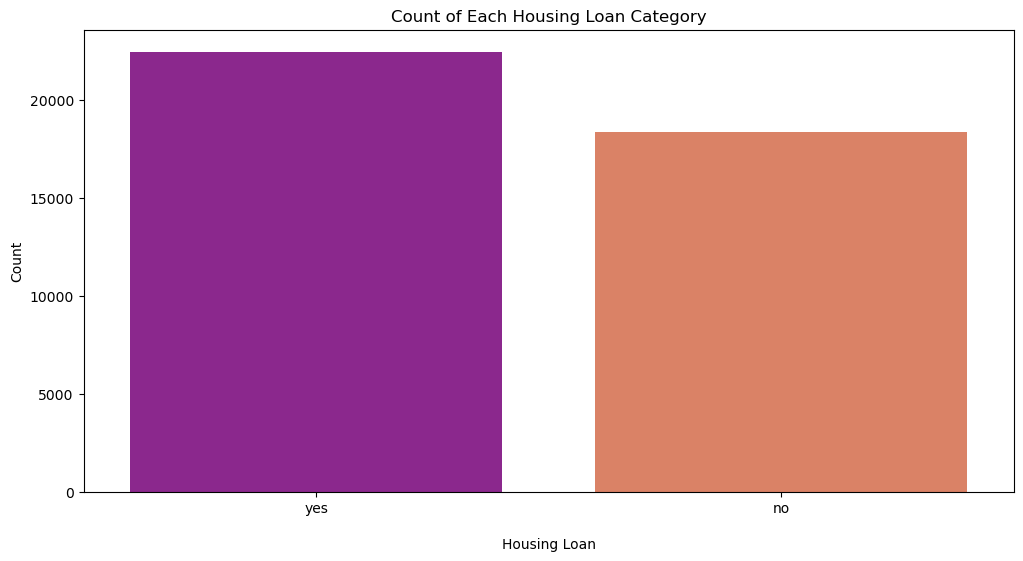

In [566]:
# Define counts
housing_counts = train_df['housing'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=housing_counts.index, y=housing_counts.values, palette='plasma')

# Add labels and title
plt.title('Count of Each Housing Loan Category')
plt.xlabel('\nHousing Loan')
plt.ylabel('Count')

# Show the plot
plt.show()


In [567]:
train_df['loan'].value_counts()

loan
no     34462
yes     6338
Name: count, dtype: int64

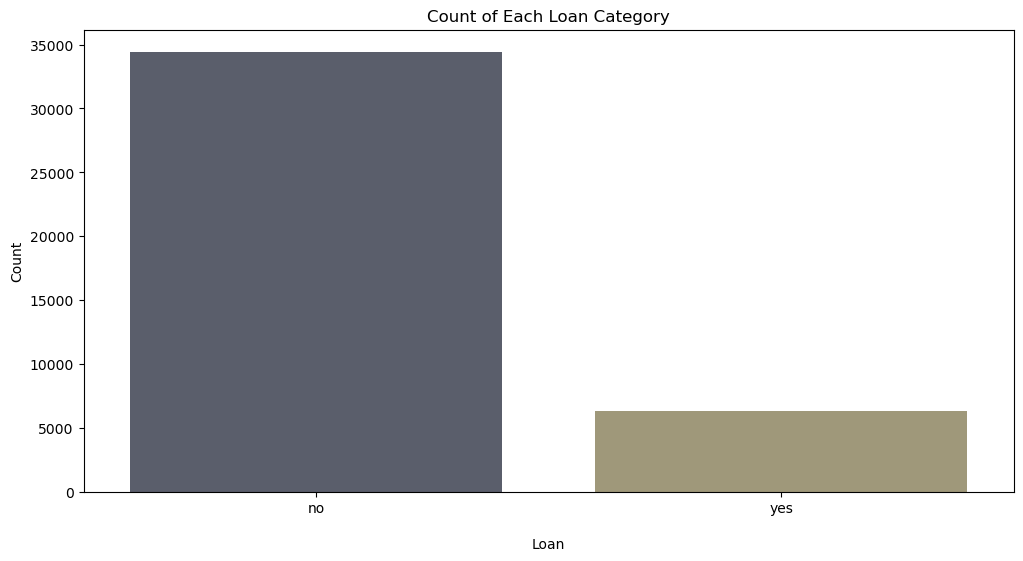

In [568]:
# Define counts
loan_counts = train_df['loan'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=loan_counts.index, y=loan_counts.values, palette='cividis')

# Add labels and title
plt.title('Count of Each Loan Category')
plt.xlabel('\nLoan')
plt.ylabel('Count')

# Show the plot
plt.show()

In [569]:
train_df['contact'].value_counts()

contact
cellular     26530
unknown      11625
telephone     2645
Name: count, dtype: int64

In [570]:
train_df['contact'] = train_df['contact'].replace('unknown', 'others')
train_df['contact'].value_counts()

contact
cellular     26530
others       11625
telephone     2645
Name: count, dtype: int64

In [571]:
#Also renaming "unkown" values with "others" in our test data
test_df['contact'] = test_df['contact'].replace('unknown', 'others')
test_df['contact'].value_counts()

contact
cellular     2896
others       1324
telephone     301
Name: count, dtype: int64

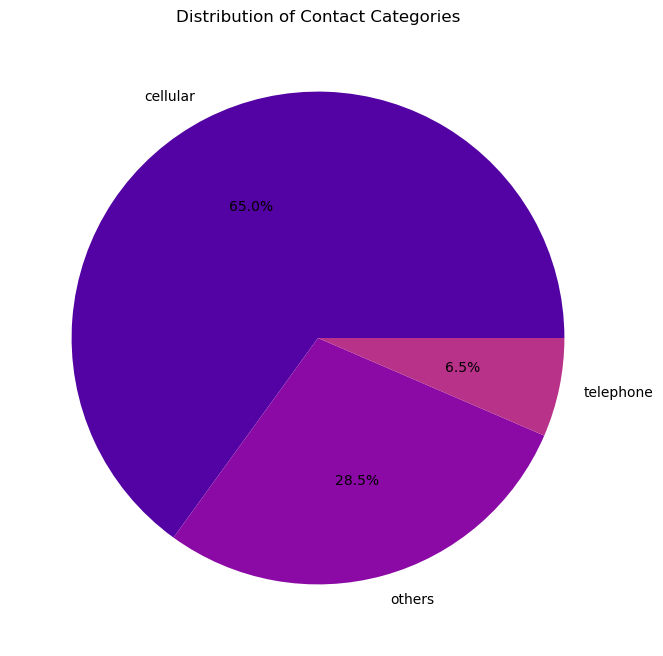

In [572]:
# Define counts
contact_counts = train_df['contact'].value_counts()

# Define figure size
plt.figure(figsize=(8, 8))  # Adjust the figure size to make it a square for a pie chart

# Create a pie chart
plt.pie(contact_counts, labels=contact_counts.index, autopct='%1.1f%%', colors=sns.color_palette('plasma'))

# Add a title
plt.title('Distribution of Contact Categories')

# Show the plot
plt.show()


In [573]:
train_df['day'].value_counts()

day
20    2425
18    2059
17    1789
5     1769
6     1768
21    1762
8     1702
14    1664
7     1654
28    1645
29    1597
19    1550
15    1533
12    1469
13    1445
9     1423
30    1422
11    1338
4     1322
16    1309
2     1173
27     960
3      959
26     892
22     832
23     816
25     768
31     573
10     474
24     417
1      291
Name: count, dtype: int64

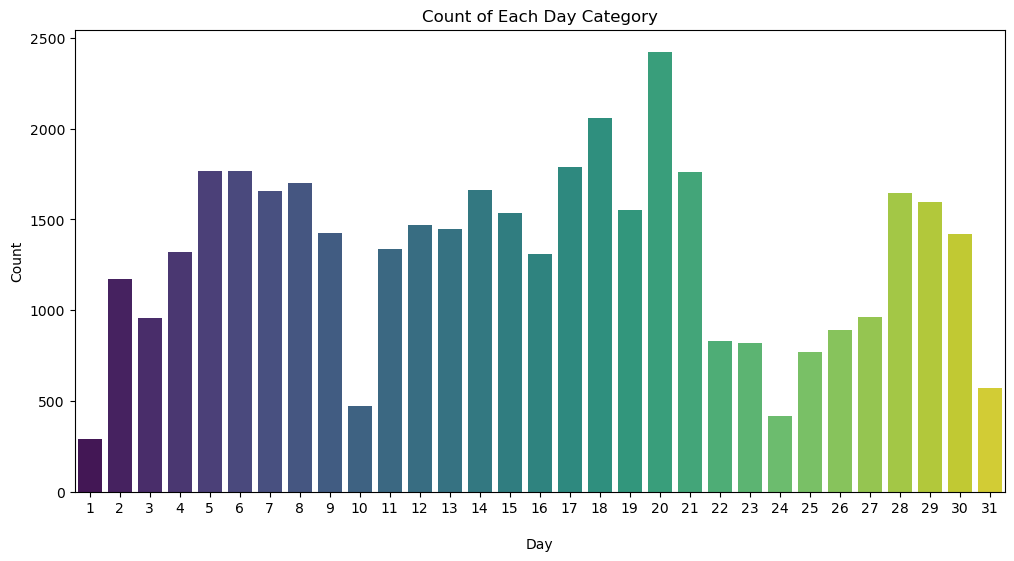

In [574]:
# Define counts
day_counts = train_df['day'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=day_counts.index, y=day_counts.values, palette='viridis')

# Add labels and title
plt.title('Count of Each Day Category')
plt.xlabel('\nDay')
plt.ylabel('Count')

# Show the plot
plt.show()

In [575]:
train_df['month'].value_counts()

month
may    12310
jul     6233
aug     5763
jun     4793
nov     3387
apr     2711
feb     2454
jan     1322
oct      668
sep      533
mar      430
dec      196
Name: count, dtype: int64

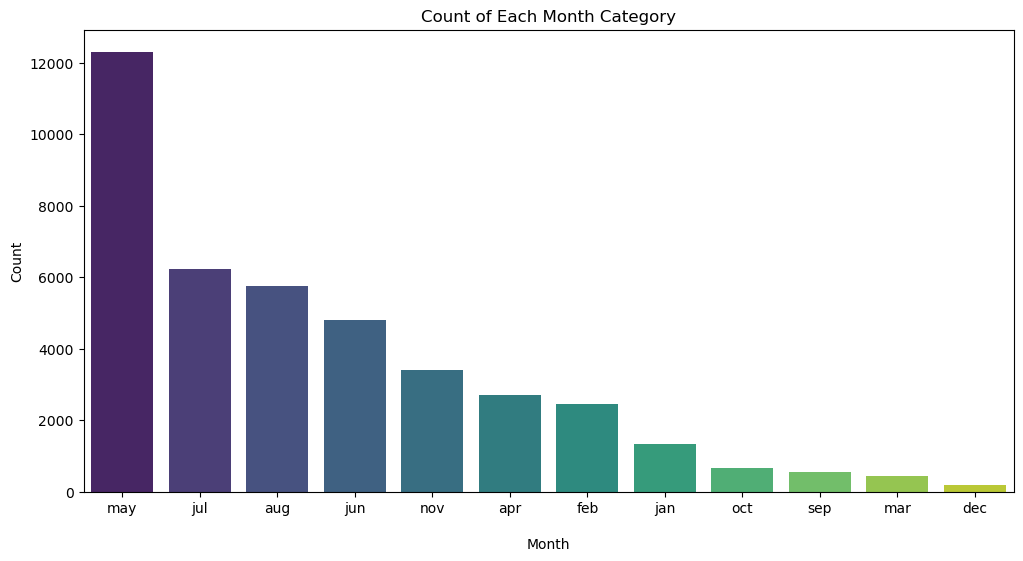

In [576]:
# Define counts
month_counts = train_df['month'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=month_counts.index, y=month_counts.values, palette='viridis')

# Add labels and title
plt.title('Count of Each Month Category')
plt.xlabel('\nMonth')
plt.ylabel('Count')

# Show the plot
plt.show()

In [577]:
train_df['duration'].describe()

count    40800.000000
mean       257.625931
std        257.278864
min          0.000000
25%        103.000000
50%        180.000000
75%        318.000000
max       3881.000000
Name: duration, dtype: float64

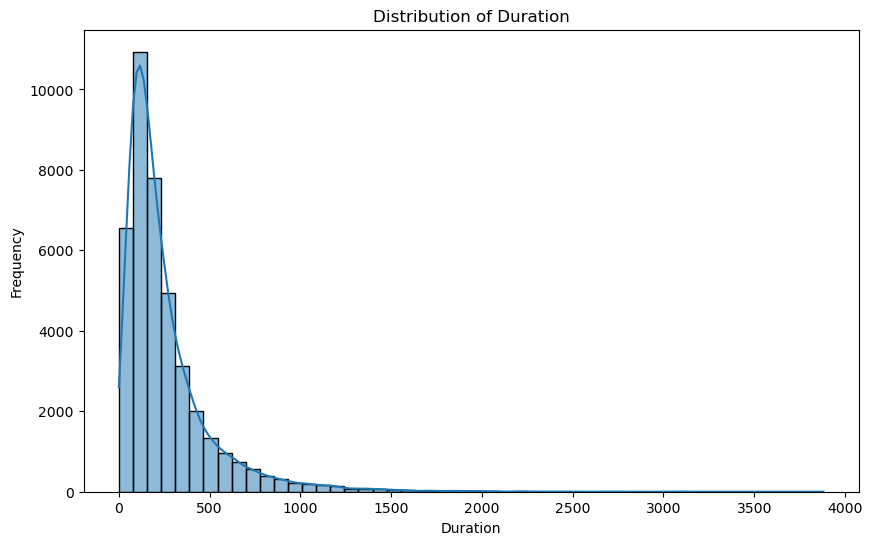

In [578]:
# Define figure size
plt.figure(figsize=(10, 6))

# Plot the histogram
ax = sns.histplot(train_df['duration'], bins=50, kde=True)

# Add labels and title
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
# plt.xticks([i for i in range(15, 100, 5)])


# Show the plot
plt.show()

In [579]:
train_df['campaign'].describe()

count    40800.000000
mean         2.760490
std          3.079005
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         58.000000
Name: campaign, dtype: float64

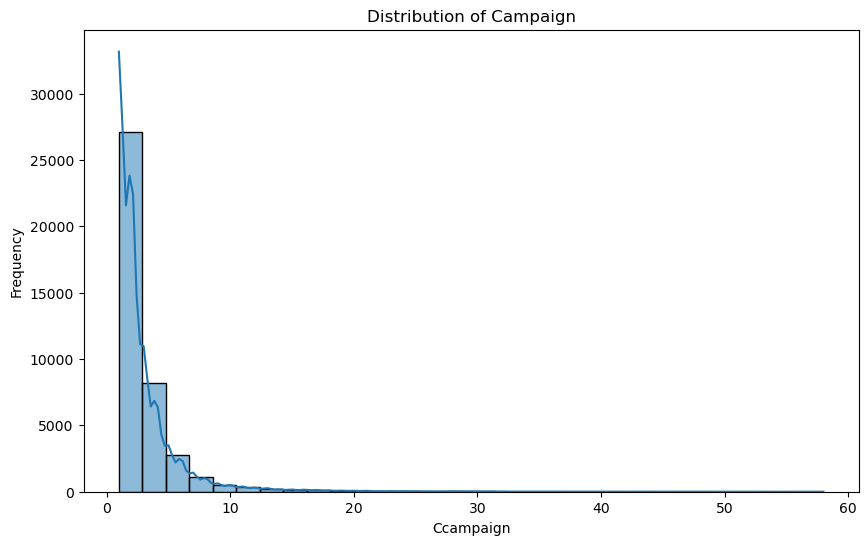

In [580]:
# Define figure size
plt.figure(figsize=(10, 6))

# Plot the histogram
ax = sns.histplot(train_df['campaign'], bins=30, kde=True)

# Add labels and title
plt.title('Distribution of Campaign')
plt.xlabel('Ccampaign')
plt.ylabel('Frequency')
# plt.xticks([i for i in range(15, 100, 5)])


# Show the plot
plt.show()

In [581]:
# Get the values that doesn't -1
filtered_data = train_df[train_df['pdays'] != -1]

# Get statistical summary
filtered_data['pdays'].describe()

count    7494.000000
mean      224.477315
std       115.930819
min         1.000000
25%       131.000000
50%       195.000000
75%       326.000000
max       871.000000
Name: pdays, dtype: float64

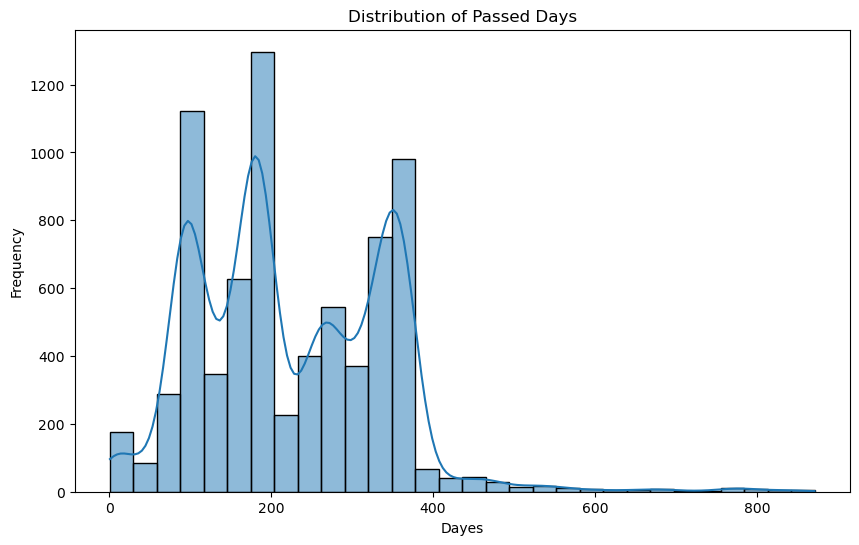

In [582]:
# Define figure size
plt.figure(figsize=(10, 6))

# Plot the histogram
ax = sns.histplot(filtered_data['pdays'], bins=30, kde=True)

# Add labels and title
plt.title('Distribution of Passed Days')
plt.xlabel('Dayes')
plt.ylabel('Frequency')
# plt.xticks([i for i in range(15, 100, 5)])


# Show the plot
plt.show()

In [583]:
train_df['previous'].value_counts()

previous
0      33306
1       2522
2       1896
3       1035
4        651
5        418
6        255
7        187
8        126
9         79
10        62
11        61
12        41
13        31
14        18
15        18
17        13
16        12
19        10
20         7
23         7
22         6
24         5
27         5
18         4
21         4
29         3
25         3
38         2
37         2
30         2
51         1
275        1
26         1
58         1
28         1
32         1
40         1
55         1
41         1
Name: count, dtype: int64

In [584]:
#This feature is useless, the most of values have 0 value.We'll drop it
train_df.drop(columns=['previous'], inplace=True)

In [585]:
#Droping this column from test data
test_df.drop(columns=['previous'], inplace=True)

In [586]:
train_df['poutcome'].value_counts()

poutcome
unknown    33311
failure     4405
other       1678
success     1406
Name: count, dtype: int64

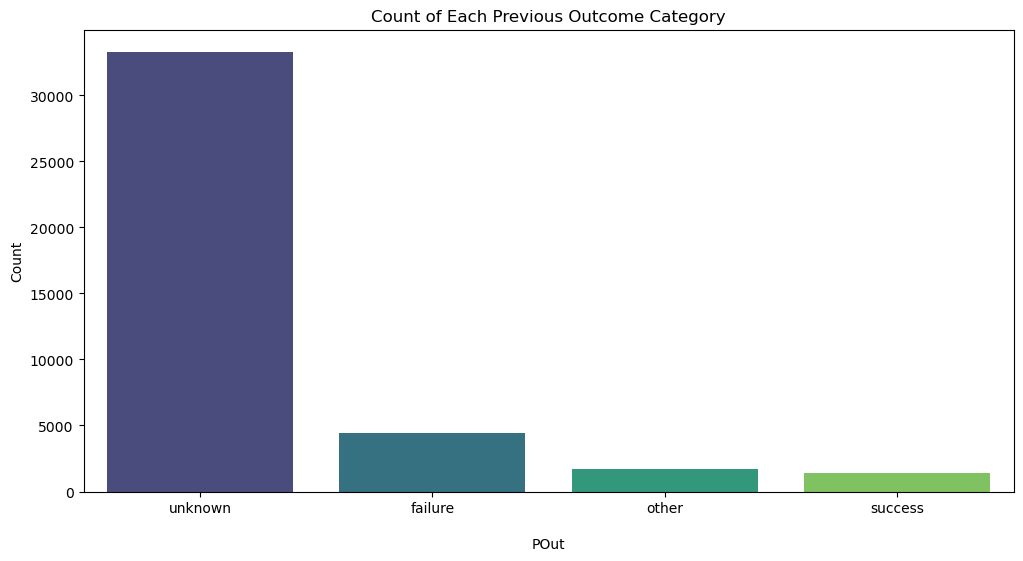

In [587]:
# Define counts
pout_counts = train_df['poutcome'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=pout_counts.index, y=pout_counts.values, palette='viridis')

# Add labels and title
plt.title('Count of Each Previous Outcome Category')
plt.xlabel('\nPOut')
plt.ylabel('Count')

# Show the plot
plt.show()

In [588]:
#This feature is useless, the most of values are unknowns.We'll drop it
train_df.drop(columns=['poutcome'], inplace=True)

In [589]:
#dropping this column from test data
test_df.drop(columns=['poutcome'], inplace=True)

In [590]:
train_df['y'].value_counts()

y
no     35971
yes     4829
Name: count, dtype: int64

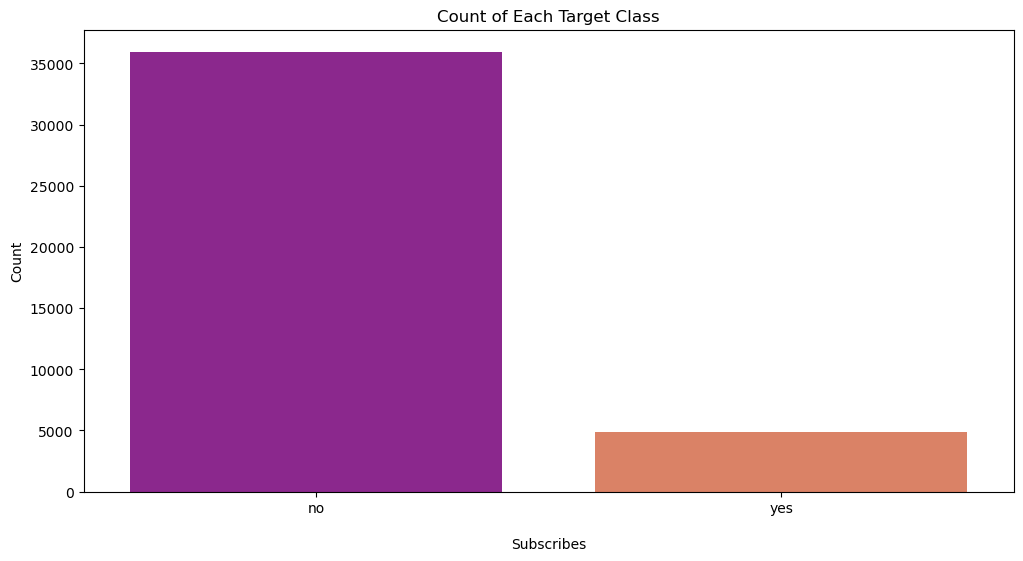

In [591]:
# Define counts
target_counts = train_df['y'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=target_counts.index, y=target_counts.values, palette='plasma')

# Add labels and title
plt.title('Count of Each Target Class')
plt.xlabel('\nSubscribes')
plt.ylabel('Count')

# Show the plot
plt.show()

## PREPROCESSING

In [592]:
train_df = train_df.apply(LabelEncoder().fit_transform)
train_df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,y
0,40,4,1,3,2310,1,0,1,4,8,261,0,0,0
1,26,10,2,2,219,1,0,1,4,8,151,0,0,0
2,15,2,1,2,192,1,1,1,4,8,76,0,0,0
3,29,1,1,0,1694,1,0,1,4,8,92,0,0,0
4,15,5,2,0,191,0,0,1,4,8,198,0,0,0


In [593]:
#Encoding test data 
test_df = test_df.apply(LabelEncoder().fit_transform)
test_df

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,y
0,11,11,1,1,1475,0,0,0,18,10,75,0,0,0
1,14,8,1,2,2030,1,1,0,10,8,216,0,228,0
2,16,4,2,3,1303,1,0,0,15,0,181,0,219,0
3,11,4,1,3,1352,1,1,1,2,6,195,3,0,0
4,40,1,1,2,274,1,0,1,4,8,222,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,14,8,1,2,119,1,0,0,29,5,325,4,0,0
4517,38,7,1,3,0,1,1,1,8,8,149,0,0,0
4518,38,10,1,2,558,0,0,0,18,1,147,10,0,0
4519,9,1,1,2,1187,0,0,0,5,3,125,3,140,0


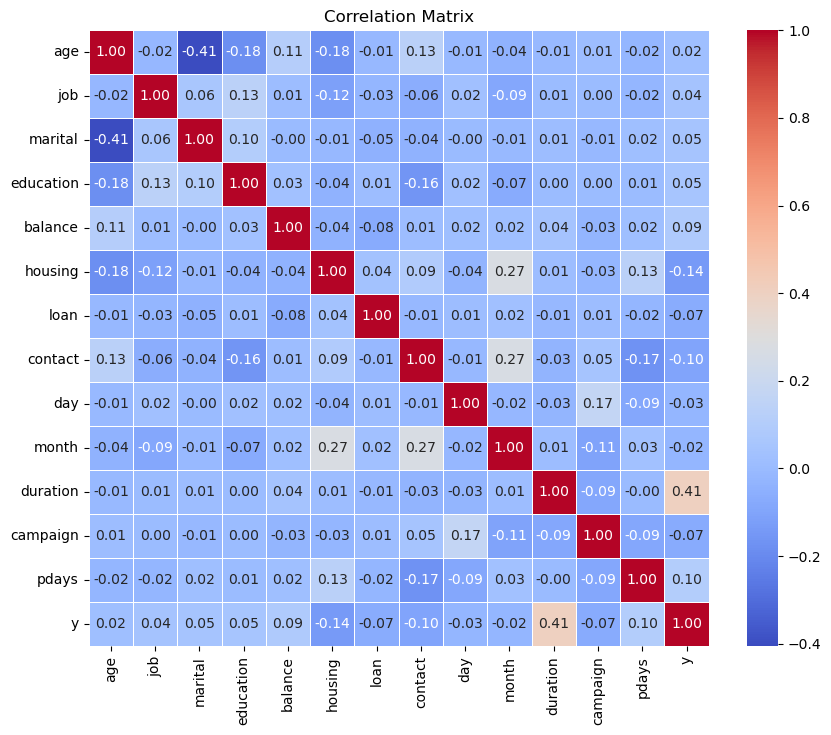

In [594]:
#Features Correlation

# Calculating the correlation matrix
correlation_matrix = train_df.corr()

# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

--DEFINING FEATURES X AND TARGET y--

In [595]:
# Train Data
train_df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,y
0,40,4,1,3,2310,1,0,1,4,8,261,0,0,0
1,26,10,2,2,219,1,0,1,4,8,151,0,0,0
2,15,2,1,2,192,1,1,1,4,8,76,0,0,0
3,29,1,1,0,1694,1,0,1,4,8,92,0,0,0
4,15,5,2,0,191,0,0,1,4,8,198,0,0,0


In [596]:
X_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]

In [597]:
# Test Data
test_df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,y
0,11,11,1,1,1475,0,0,0,18,10,75,0,0,0
1,14,8,1,2,2030,1,1,0,10,8,216,0,228,0
2,16,4,2,3,1303,1,0,0,15,0,181,0,219,0
3,11,4,1,3,1352,1,1,1,2,6,195,3,0,0
4,40,1,1,2,274,1,0,1,4,8,222,0,0,0


In [598]:
X_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]

--FEATURE SCALING--

In [599]:
# Print the column names and their corresponding indices
column_names = X_train.columns
for i, column in enumerate(column_names):
    print(f"Column '{column}' has index {i}")


Column 'age' has index 0
Column 'job' has index 1
Column 'marital' has index 2
Column 'education' has index 3
Column 'balance' has index 4
Column 'housing' has index 5
Column 'loan' has index 6
Column 'contact' has index 7
Column 'day' has index 8
Column 'month' has index 9
Column 'duration' has index 10
Column 'campaign' has index 11
Column 'pdays' has index 12


In [600]:
print("X_train columns:", X_train.columns)


X_train columns: Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'campaign', 'pdays'],
      dtype='object')


## MACHINE LEARNING ALGORITHMS

--LOGISTIC REGRESSION--

In [603]:
# Logistic Regression model
lr = LogisticRegression(penalty='l2', C=1.0, max_iter=1000)

# Train the model
lr.fit(X_train, y_train)

/Users/serhat/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [604]:
# Train Score
print(lr.score(X_train, y_train))

0.8881617647058824


In [605]:
# Test Score
print(lr.score(X_test, y_test))

0.8852023888520238


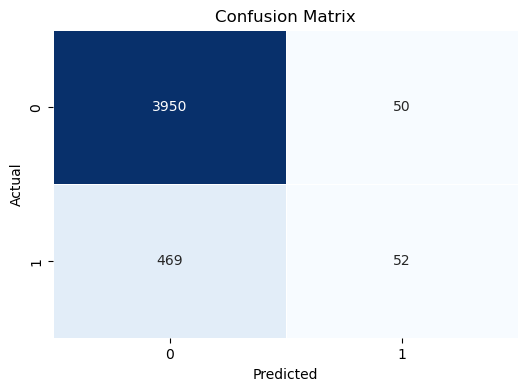

In [606]:
# Make predictions on the test set
y_pred = lr.predict(X_test)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [607]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      4000
           1       0.51      0.10      0.17       521

    accuracy                           0.89      4521
   macro avg       0.70      0.54      0.55      4521
weighted avg       0.85      0.89      0.85      4521



In [608]:
# K-Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [609]:
print(knn.score(X_train, y_train))

0.9104166666666667


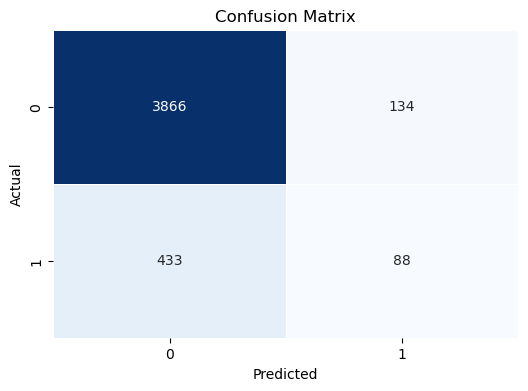

In [610]:
# Make predictions on the test set
y_pred = knn.predict(X_test)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [611]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      4000
           1       0.40      0.17      0.24       521

    accuracy                           0.87      4521
   macro avg       0.65      0.57      0.58      4521
weighted avg       0.84      0.87      0.85      4521



--DECISION TREE CLASSIFIER--

In [612]:
# Decision Tree model
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [613]:
# Train Score
print(clf.score(X_train, y_train))

1.0


In [614]:
# Test Score
print(clf.score(X_test, y_test))

0.896040698960407


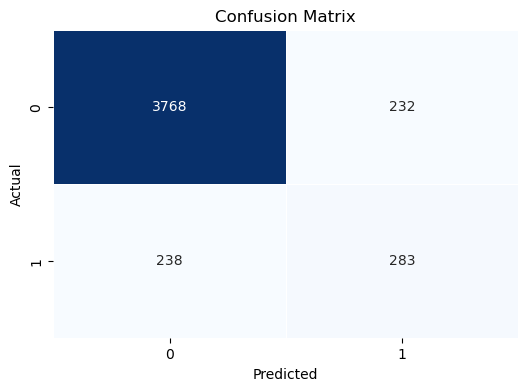

In [615]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [616]:
# Selecting only two features for the Decision Tree
X_train_dt = X_train[['age', 'balance']]
X_test_dt = X_test[['age', 'balance']]

# Training the Decision Tree Classifier with a limited depth
clf_dt = DecisionTreeClassifier(max_depth=3)  # Set the depth limit here
clf_dt.fit(X_train_dt, y_train)

# Training the Decision Tree Classifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train_dt, y_train)

# Evaluating the Decision Tree model
y_pred_dt = clf_dt.predict(X_test_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy with two features: {accuracy_dt}")


Decision Tree Accuracy with two features: 0.8272506082725061


## CONCLUSION